## Assignment 1, Music Informatics, Vasileios Katsaitis

In [5]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa
# import sounddevice as sd # Can be commented out if it's not installed on your system, it's not necessary for the code to run
from scipy.io import wavfile
from scipy.signal import find_peaks
from scipy.interpolate import interp1d


### The following two code cells will be *completely* complementary to our project. They create, play and save sine wave signals needed for the first part of our project.

### Complementary code cell 1

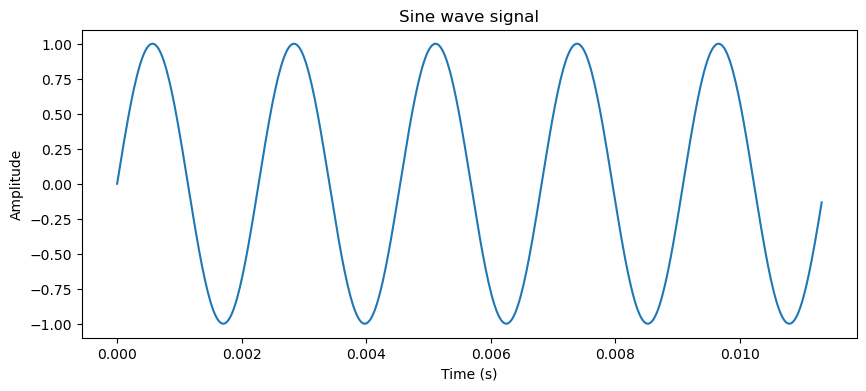

In [6]:
# This code cell creates, plays and saves a quantized sine wave signal.

# NOTE: In code cells below, audio files created are by default quantized.
# If you want to create a floating point audio file, you need to comment out the quantization line of code in each code cell.
# This is done, in order to be able to play the audio files in Windows Media Player, which doesn't support floating point audio files.
# If we intent to open the .wav file using a program that supports floating point numbers, like VLC player, or not open it at all,
# we DON'T NEED to quantize the signal to begin with, so line of code 'sine_wave = np.int16(sine_wave * 32767)' can be ERASED / COMMENTED OUT.

# We will use the following parameters:
f = 440 # Hz (frequency of the note A4)
max_amplitude = 10
A = np.random.randint(1, max_amplitude) # amplitude
sr = 44100 # sampling rate
duration = 2
N = sr * duration # number of samples
t = np.linspace(0, duration, N, endpoint = False) # time vector

# We will, now, create the signal
sine_wave = A * np.sin(2 * np.pi * f * t)

# We, first, normalize the signal
sine_wave = sine_wave / sine_wave.max()

# We will, now, play the signal
# sd.play(sine_wave, sr)

# We quantize the signal using 16-bit PCM
# sine_wave = np.int16(sine_wave * 32767) # This quantization sets the signal_A range to [-32767, 32767] = [-(2^(16-1) - 1), 2^(16-1) - 1], so 1 is not the maximum amplitude anymore

# We, now, plot the signal
plt.figure(figsize = (10, 4))
plt.plot(t[:500], sine_wave[:500]) # We plot only the first 500 samples so that it's easier to visualize the signal
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sine wave signal')
plt.show()

# We want to finally save the signal to a folder called 'Sound files'
# For that purpose, we need to create the folder first, if it doesn't already exist
if not os.path.exists('Sound files'):
    os.makedirs('Sound files')

# And we, now, save the signal
wavfile.write('Sound files/sine_wave.wav', sr, sine_wave)


### Complementary code cell 2

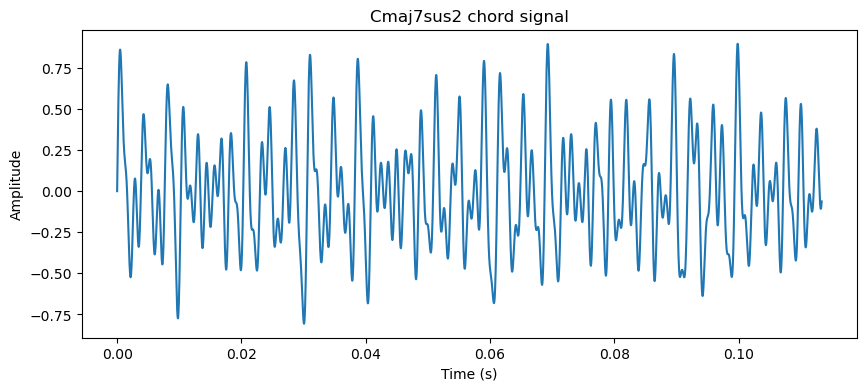

In [7]:
# This code cell creates, plays and saves a more musical quantized signal that contains all the notes of the Cmaj7sus2 chord (including the fifth note on a higher octave).

# NOTE: Just like in the previous code cell, the signal will be quantized using 32-bit PCM, in order to be supported by the .wav format of Media Player for Windows.
# If we intent to open the .wav file using a program that supports floating point numbers, like VLC player, or not open it at all,
# we DON'T NEED to quantize the signal to begin with, so line of code 'signal = np.int32(signal * (2**31 - 1))' can be ERASED / COMMENTED OUT.

# We will use the following parameters:
# We, first, define a list containing the frequencies of the notes of the respective chord (frequencies of the notes C4, D4, G4, B4 and G5)
frequencies = [261.63, 293.66, 392.00, 493.88, 783.99] # Hz
max_amplitude = 10
A = np.random.randint(1, max_amplitude) # amplitude
sr = 44100 # sampling rate
duration = 3
N = sr * duration # number of samples
t = np.linspace(0, duration, N, endpoint = False) # time vector

# We will, now, create the signal using the superposition of the 4 sine waves corresponding to the notes of this Cmaj7sus2 chord
signal = np.zeros(N) # We initialize the signal as an array of zeros
for f in frequencies:
    sine_wave = A * np.sin(2 * np.pi * f * t)
    signal += sine_wave # We add the sine wave corresponding to each note to the signal

# We, first, normalize the signal
signal = signal / signal.max()

# We will, now, play the signal
# sd.play(signal, sr)

# We quantize the signal using 32-bit PCM
# signal = np.int32(signal * (2**31 - 1)) # Commenting out this line means that signal will still be normalized, but not replayed by Windows Media Player

# We, now, plot the signal
plt.figure(figsize = (10, 4))
plt.plot(t[:5000], signal[:5000]) # We plot only the first 5000 samples so that it's easier to visualize the signal (it's adjustable)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Cmaj7sus2 chord signal')
plt.show()

# We repeat the same process as before, in order to save the signal to a folder called 'Sound files', in case user didn't run the previous code cell
if not os.path.exists('Sound files'):
    os.makedirs('Sound files')

# And we, now, save the signal
wavfile.write('Sound files/C_maj_7_sus_2_chord.wav', sr, signal)

# NOTE: Quantized signals tend to be more noisy than floating point signals, so the sound quality of the saved audio files might not be the best (because of SQNR).
# This is why it's advised to use floating point signals when possible, if the program that will open the audio file supports them.


### Question A

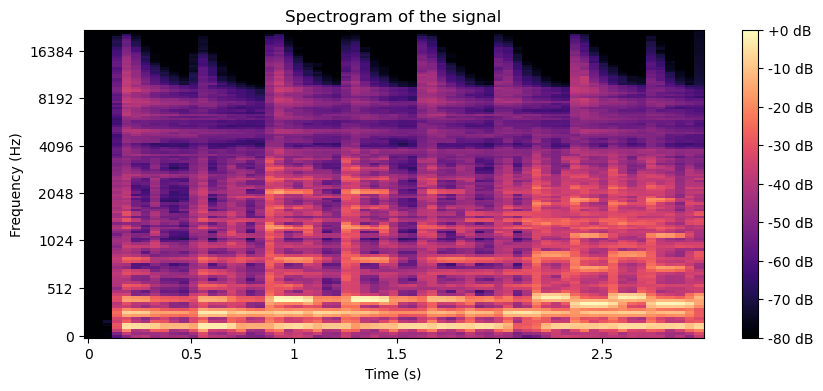

The 10 strongest frequencies extracted from the signal are:
1. 2122.84 Hz
2. 2035.38 Hz
3. 2144.04 Hz
4. 2056.59 Hz
5. 2366.66 Hz
6. 2292.46 Hz
7. 2387.87 Hz
8. 548.60 Hz
9. 2316.31 Hz
10. 720.87 Hz


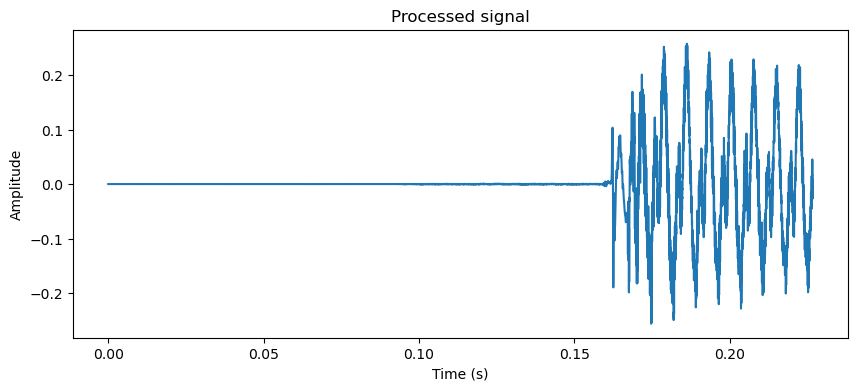

In [8]:
# Code that corresponds to Question A 

# First, we need to define a musical signal (not a noisy one) with a duration not longer than 3 seconds (and a frequency of our choosing)
# We can either load a prievously created signal or a new one (like a song)

# We will load it using the librosa library (equivalent to MATLAB's audioread function)
wav_file = 'Vasileios_Katsaitis_Assignment_1_8_seconds.wav'
sr = 44100 # sampling rate
N = sr * duration # number of samples
t = np.linspace(0, duration, N, endpoint = False) # time vector
max_duration = 3 # seconds
signal_A, new_sr = librosa.load(wav_file, sr = sr, mono = False) # This method automatically normalizes the signal
# NOTE: For mono signals, we can use the argument mono = False in function above to load the audio signal as stereo (in order to create 2 channels and test our code)

# We, now, check if the signal is in stereo
# Essentially, signal is a 1D array if it's mono and a 2D array if it's stereo
if signal_A.ndim == 2: # If the signal is in stereo
    # We initially compute the RMS value for each channel
    rms_values = [librosa.feature.rms(y = channel) for channel in signal_A] # rms_values is a list of two 1D arrays containing the RMS values of each channel
    
    # We, now, select the channel with the highest RMS value
    # We do this by first creating a list of the maximum RMS values of each channel and then selecting the index of the highest value (channel index)
    max_RMS_values = [np.max(rms) for rms in rms_values]
    highest_RMS_channel_index = np.argmax(max_RMS_values)
        
    # And we keep only the selected channel, discarding the other one
    signal_A = signal_A[highest_RMS_channel_index]


# We trim the signal to 3 seconds if it exceeds that duration
if len(signal_A) > max_duration * new_sr:
    signal_A = signal_A[:max_duration * new_sr] # Remember that max_duration * new_sr = number of samples of loaded signal
    
# We remove the DC component (mean value of the signal)
signal_A = signal_A - np.mean(signal_A)

# Plotting the signal's spectrogram using a Hanning window of length 4096 samples and 50% overlap (hop size)
# First, we define our hyperparameters
n_fft = 4096  # FFT length
hop_length = int(n_fft / 2)  # Hop size (50% overlap)

# We, now, compute the spectrogram using the librosa library
spectrogram = librosa.feature.melspectrogram(y = signal_A, sr = new_sr, n_fft = n_fft, hop_length = hop_length, window = 'hann')

# We convert the power spectrogram to dB
spectrogram_db = librosa.power_to_db(spectrogram, ref = np.max)

# We, now, plot the spectrogram
plt.figure(figsize = (10, 4))
librosa.display.specshow(spectrogram_db, sr = new_sr, hop_length = hop_length, x_axis = 'time', y_axis = 'mel')
plt.colorbar(format = '%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of the signal')
plt.show()


# Extracting the 10 strongest frequencies (peaks) from the signal (using the spectrogram)
# We first define the number of peaks we want to extract (hyperparameter)
n_peaks = 10

# We want to find the peaks of the spectrogram
# We will use the find_peaks function from the scipy library
# We need to flatten the spectrogram first, in order to find the peaks
spectrogram_db_flat = spectrogram_db.flatten()
peaks, _ = find_peaks(spectrogram_db_flat, distance = 1) # We set the distance between peaks to 1 in order to find all peaks

# We, now, sort the peaks in descending order of their values
sorted_peaks = np.argsort(spectrogram_db_flat[peaks])[::-1] # We use argsort to get the indices of the sorted peaks and then reverse the order

# We, also, want to extract the magnitude of the peaks
peak_magnitudes = spectrogram_db_flat[peaks]

# We, now, extract the frequencies of the 'n_peaks' (10) strongest peaks 
strongest_frequencies = []
for peak in sorted_peaks[:n_peaks]:
    # We first compute the index of the peak in the spectrogram
    peak_index = peaks[peak]
    
    # We, now, get the frequency of the peak as such:
    # We scale the peak index to the range of frequencies (0 to sr / 2), using the formula below.
    # We divide by len(spectrogram_db_flat), because we want to scale frequency and get it to fall into the range of [0, new_sr / 2], since that is the range of frequencies of the spectrogram
    frequency = peak_index * (new_sr / 2) / len(spectrogram_db_flat)
    strongest_frequencies.append(frequency)

# We, now, print the extracted frequencies
print('The 10 strongest frequencies extracted from the signal are:')
for i in range(len(strongest_frequencies)):
    print(f'{i + 1}. {strongest_frequencies[i]:.2f} Hz')

# We play the signal
# sd.play(signal_A, new_sr)

# We quantize the signal using 32-bit PCM
# signal_A = np.int32(signal_A * (2**31 - 1)) # Commenting out this line means that signal will still be normalized, but not replayed by Windows Media Player

# Since it's not mandatory to run first two code cells, we need to create the folder 'Sound files' if it doesn't already exist
if not os.path.exists('Sound files'):
    os.makedirs('Sound files')

# We save the signal
wavfile.write('Sound files/processed_signal_A.wav', new_sr, signal_A)

# We, optionally, plot the signal
plt.figure(figsize = (10, 4))
plt.plot(t[:10000], signal_A[:10000]) # We plot only the first 10000 samples so that it's easier to visualize the signal
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Processed signal')
plt.show()


### Question B, subquestion 1 (B1)

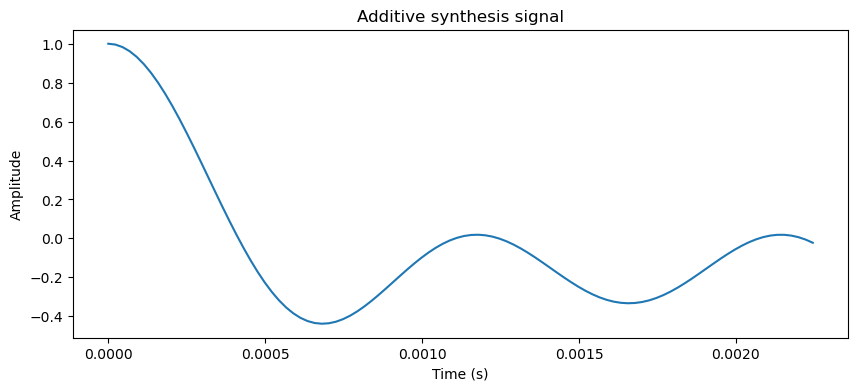

In [9]:
# Code that corresponds to Question B, subquestion 1
# In this code cell, we will define 3 signals with 3 different fundamental frequencies f1, f2 and f3
# With these 3 signals, we will create a new signal using additive synthesis (superposition of the 3 signals)

# First, we define some hyperparameters for our additive synthesis model
fs = 44100 # Sampling rate
Ts = 1 / fs # Sampling period
# duration = 3 # seconds (duration of the signal)
# N = duration * fs # Number of samples
N = 512
duration = N / fs # seconds (duration of the signal)
t = np.linspace(0, duration, N, endpoint = False) # Time vector
# t = np.arange(0, duration, Ts) # Time vector

# We define the 3 fundamental frequencies
f1 = 301.4648 # Hz
f2 = 2 * f1 
f3 = 3 * f1

# All 3 signals should have unit magnitude (normalized amplitude) and no initial phase
s1 = np.cos(2 * np.pi * f1 * t)
s2 = np.cos(2 * np.pi * f2 * t)
s3 = np.cos(2 * np.pi * f3 * t)

# We want to create the new signal using additive synthesis
new_signal = s1 + s2 + s3

# We, first, normalize the signal
new_signal = new_signal / new_signal.max()

# We will, now, play the original signal
# sd.play(new_signal, fs)

# We quantize the signal using 32-bit PCM (not neccessary, again can be commented out)
# new_signal = np.int32(new_signal * (2**31 - 1))

# Since we want the new signal to have a length of 512 samples, we need to interpolate it
# new_t = np.linspace(0, 512 / fs, 512, endpoint = False) # Time vector for the new signal
# new_signal_interp = np.interp(new_t, t, new_signal)


# We, now, play the synthesized signal
# sd.play(new_signal, fs)

# We quantize the signal using 32-bit PCM (not neccessary, again can be commented out)
# new_signal_interp = np.int32(new_signal_interp * (2**31 - 1))

# We optionally save the signal in the 'Sound files' folder
wavfile.write('Sound files/additive_synthesis_signal_B1.wav', fs, new_signal)
# NOTE: We do not intent to replay the synthesized signal in Windows Media Player, so we don't quantize it to 32-bit PCM

# We, now, plot the synthesized signal
plt.figure(figsize = (10, 4))
plt.plot(t[:100], new_signal[:100]) # We plot only the first 100 samples so that it's easier to visualize the signal
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Additive synthesis signal')
plt.show()


### Question B, subquestion 2 (B2)

512


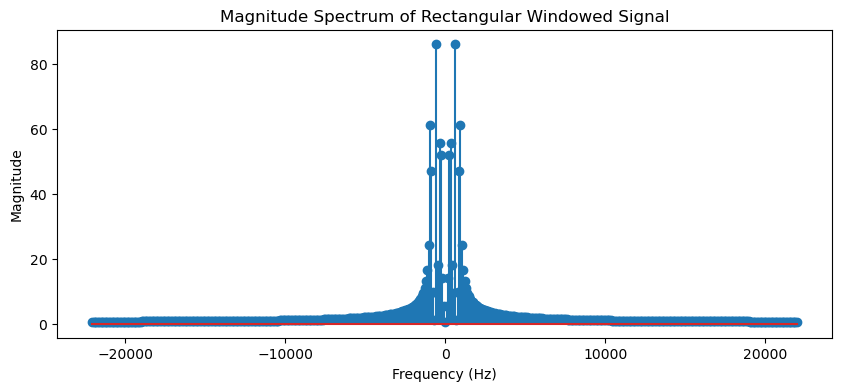


Original frequencies:
 [301.4648, 602.9296, 904.3944000000001]

Peak frequencies:
 [  344.53125     602.9296875   947.4609375 43152.5390625 43497.0703125
 43755.46875  ]


In [10]:
# In this code cell, we will retrieve the synthesized signal we defined above using Discrete Fourier Transform (DFT)
# We will compute the DFT of the synthesized signal, following steps below:

#* Subquestion B.2.a

signal_B = new_signal # We use the synthesized signal from the previous code cell

# First, we define the DFT length (N)
N = len(signal_B) # Number of samples of the signal
print(N)

# We, now, apply a rectangular window to the signal
window = np.ones(N) # Rectangular window

# We, then, multiply the signal by the window
windowed_signal = signal_B * window

# We perform the Discrete Fourier Transform (DFT) on the windowed signal
magnitude_spectrum = np.abs(np.fft.fft(windowed_signal)) # We use np.abs to get the magnitude of the DFT (to keep only the real part)

# We get the frequency axis of the DFT (we want to keep only the positive frequencies)
freq_axis = np.fft.fftfreq(N, 1 / fs) # We use the sampling frequency to get the frequency axis

# We, finally, plot the magnitude spectrum of the signal
plt.figure(figsize = (10, 4))
plt.stem(freq_axis, magnitude_spectrum) # We use a stem plot to visualize the magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Rectangular Windowed Signal')
plt.show()

#* Subquestion B.2.b
# We, now, want to generate a vector (fk) that contains the frequencies of the N frequency bins of the DFT
# We do this by using the formula fk = k * fs / N (= k * 1 / Ts = k * 1 / (N * fs)), where k is the index of the frequency bin

# So, we first define the index vector (k) of the frequency bins
k = np.arange(0, N) # Index vector

# We, now, compute the frequency vector (fk) using the formula above
fk = k * fs / N


#* Subquestion B.2.c
# We, now, want to get the peaks (DFT amplitude values) and locations (bins) of the magnitude spectrum
# We will use the find_peaks function from the scipy library to get the peaks

# We first need to flatten the magnitude spectrum
magnitude_spectrum_flat = magnitude_spectrum.flatten()

# We, then, find the peaks of the magnitude spectrum
pks, _ = find_peaks(magnitude_spectrum_flat, distance = 1) # We set the distance between peaks to 1 in order to find all peaks

# We, now, get the locations (bins) and values of the peaks
locs = pks # The location of the peaks is simply the indices of the peaks
pk_values = magnitude_spectrum_flat[locs] # Values


#* Subquestion B.2.d
# We, now, want to convert each of the peak locations (bins) to the corresponding frequency values
# and generate a vector (pk_pairs) that contains amplitude - frequency pairs of the peaks

# To convert the peak locations (bins) to frequency values, we use the formula fk = k * fs / N
# that we implemented above
peak_frequencies = fk[locs] # We get the frequency values of the peak locations

# We, then, generate the amplitude - frequency vector (list) of the peaks
# NOTE: Conventionally, we add the amplitude of the peak first, then the corresponding frequency
amplitude_frequency_pairs = []
for i in range(len(locs)):
    amplitude_frequency_pairs.append(pk_values[i])  # Amplitude of the peak
    amplitude_frequency_pairs.append(peak_frequencies[i])  # Frequency of the peak

# Alternatively, we can use a list of tuples to store the amplitude - frequency pairs
# amplitude_frequency_pairs = list(zip(pk_values, peak_frequencies))

# print("Original Amplitude - Frequency pairs:\n", amplitude_frequency_pairs)

#* Subquestion B.2.e
# Commenting on the accuracy of the results of the peak frequencies and their amplitudes (based on the magnitude spectrum)

# We see that the peak frequencies and their amplitudes are not exactly the same as the original frequencies and amplitudes of the synthesized signal
# We can compare the peak frequencies with the original frequencies, simply by printing them out

print("\nOriginal frequencies:\n", [f1, f2, f3])
print("\nPeak frequencies:\n", peak_frequencies)

# This is due to the fact that the DFT is not able to perfectly represent the synthesized signal in the frequency domain, since we use a rectangular window of the size of the signal
# This means that DFT is averaged over the window size, which causes the peaks to be spread out and not exactly at the original frequencies
# This is known as spectral leakage, which is a common issue in DFT analysis
# It can be solved by using a window function that tapers the signal at the edges, such as the Hamming window, which reduces the leakage effect
# In this case, we used a rectangular window, which is the simplest window function and has the worst leakage effect
# Therefore, the peak frequencies are not exactly the same as the original frequencies of the synthesized signal


### Question B, subquestion 3 (B3)

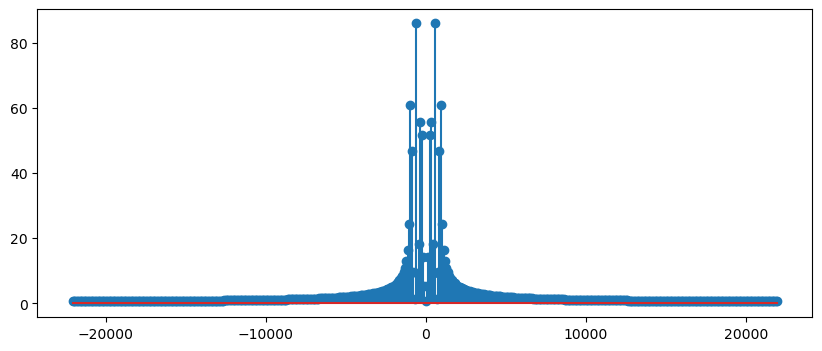

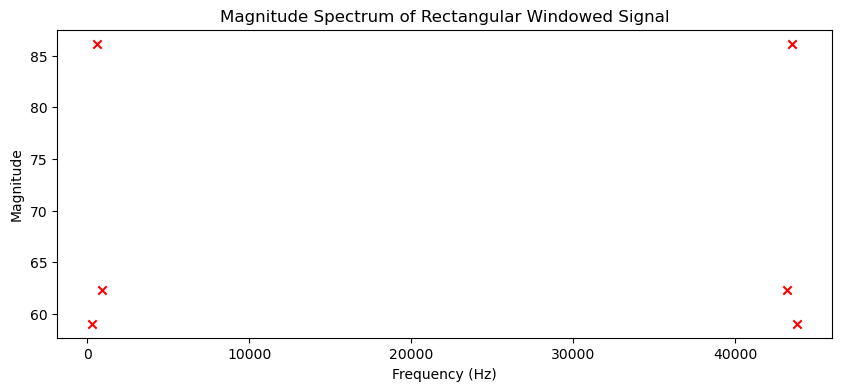

In [11]:
# In this code cell, we will use the parabolic interpolation method to estimate the peak frequencies more accurately than before
# For a proper comparison, we will be using the peak locations (locs) and values (pks) of the magnitude spectrum that we found in the previous code cell
# After performing parabolic interpolation on each peak, we will store respective amplitude - frequency pairs in a list, just like before

# We start by initializing an empty list to store the amplitude - frequency pairs of the peaks
amplitude_frequency_pairs_parabolic = []

# We, now, perform parabolic interpolation on each peak to estimate the peak frequency more accurately
# Since parabolic interpolation requires 3 points to find local maximum, we will use the peak location
# and its two neighboring points to perform the interpolation
for loc in locs:
    # We get the 3 points for parabolic interpolation
    b = loc  # Index of the peak
    a = max(b - 1, 0)  # Index of the point to the left of the peak (if it exceeds the bounds of the array, we set it to 0) 
    c = min(b + 1, len(magnitude_spectrum_flat) - 1)  # Index of the point to the right of the peak (if it exceeds the bounds of the array, we set it to the last index)
    
    # We, now, get the magnitudes of the 3 points
    fa = magnitude_spectrum_flat[a]
    fb = magnitude_spectrum_flat[b]
    fc = magnitude_spectrum_flat[c]
    
    # And, then, use the parabolic interpolation formula to estimate the peak frequency using the 3 points, as such: 
    
    # We calculate the interpolated peak location (bin) first
    interpolated_loc = 0.5 * (fa - fc) / (fa - 2 * fb + fc)
    
    # We, then, calculate the magnitude of the interpolated peak location
    interpolated_mag = fb - 0.25 * (fa - fc) * interpolated_loc
    
    # We get the interpolated frequency of the peak using the formula fk = k * fs / N
    interpolated_freq = (loc + interpolated_loc) * fs / N
    
    # And we, finally, append the amplitude - frequency pair to the list
    amplitude_frequency_pairs_parabolic.append(interpolated_mag)
    amplitude_frequency_pairs_parabolic.append(interpolated_freq)


# We, now, print the amplitude - frequency pairs obtained using parabolic interpolation
# print("\nAmplitude - Frequency pairs obtained WITH parabolic interpolation:\n", amplitude_frequency_pairs_parabolic)

# To estimate whether the result improve or not, we print the previously obtained amplitude - frequency pairs
# print("\nAmplitude - Frequency pairs obtained WITHOUT parabolic interpolation:\n", amplitude_frequency_pairs)

# We, optionally, plot the magnitude spectrum of the originally rectangular windowed signal, as well as and the interpolated signal
plt.figure(figsize = (10, 4))

plt.stem(freq_axis, magnitude_spectrum, label = 'Magnitude Spectrum of Windowed Signal')

# We, now, plot the peak frequencies of the interpolated signal
plt.figure(figsize = (10, 4))
plt.scatter(amplitude_frequency_pairs_parabolic[1::2], amplitude_frequency_pairs_parabolic[::2], color = 'red', marker = 'x', label = 'Estimated Peaks using Parabolic Interpolation)') 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Rectangular Windowed Signal')
plt.show()


# NOTE: We can see that the amplitude - frequency pairs obtained using parabolic interpolation are more accurate than the ones obtained without it.
# In general, parabolic interpolation provides a more accurate estimation of the peak frequency than simply taking the peak location, because it 
# takes into account the magnitudes of the neighboring points, and does not average the values like the previously applied DFT does.
# Therefore, parabolic interpolation is a useful technique to improve the accuracy of peak frequency estimation in spectral analysis, reducing the effect of spectral leakage.

# We clearly see that the second peak is significantly higher than the first and third peak in the magnitude spectrum of the signal (whether we check the positive or negative frequencies).
# It's not clear why the second peak is higher than the other peaks, but it could be due to the fact that the second harmonic has a higher amplitude than the other harmonics in the synthesized signal.
# Another reason could be that the second harmonic is closer to the center frequency of the DFT, which is the DC component (0 Hz), and the DFT is more sensitive to frequencies closer to the center frequency.
# This makes the second peak more prominent in the magnitude spectrum, as well as the fact that the DFT is not able to perfectly represent the synthesized signal in the frequency domain, due to spectral leakage.
# This is, probably, why the second peak is higher than the other peaks in the magnitude spectrum of the signal, but there are multiple factors to consider.


### Question B, subquestion 4 (B4)

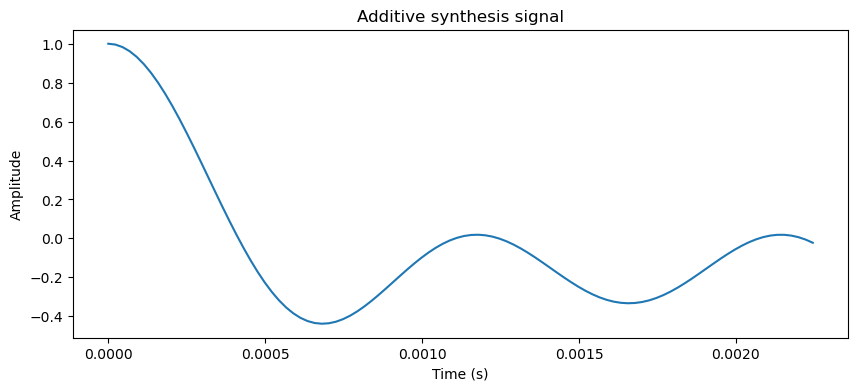

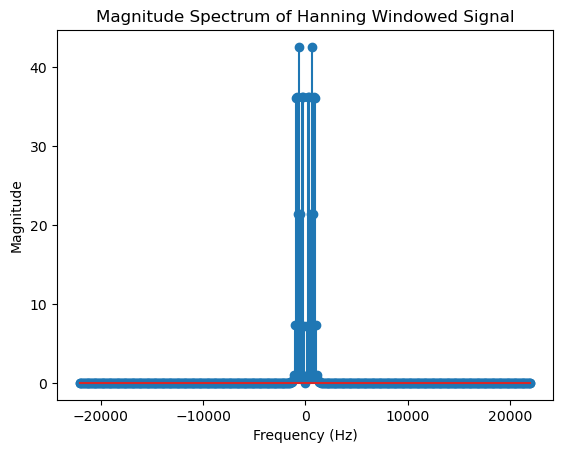

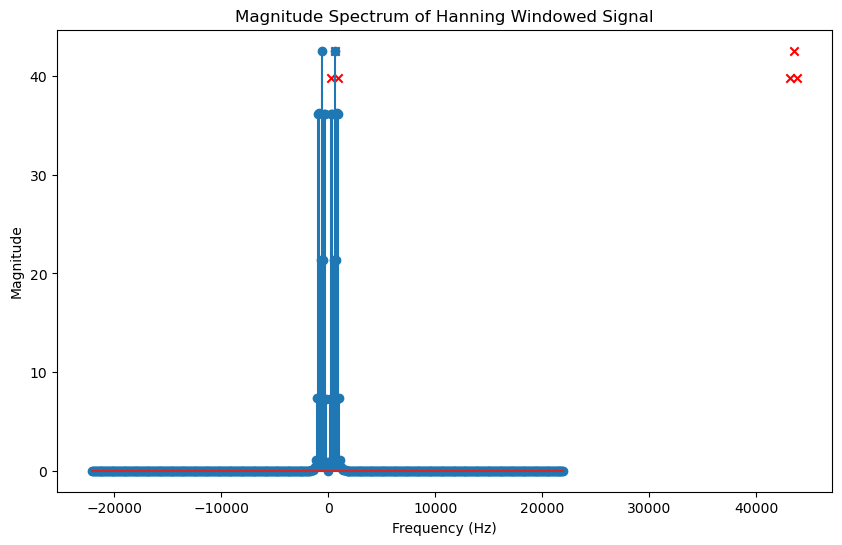

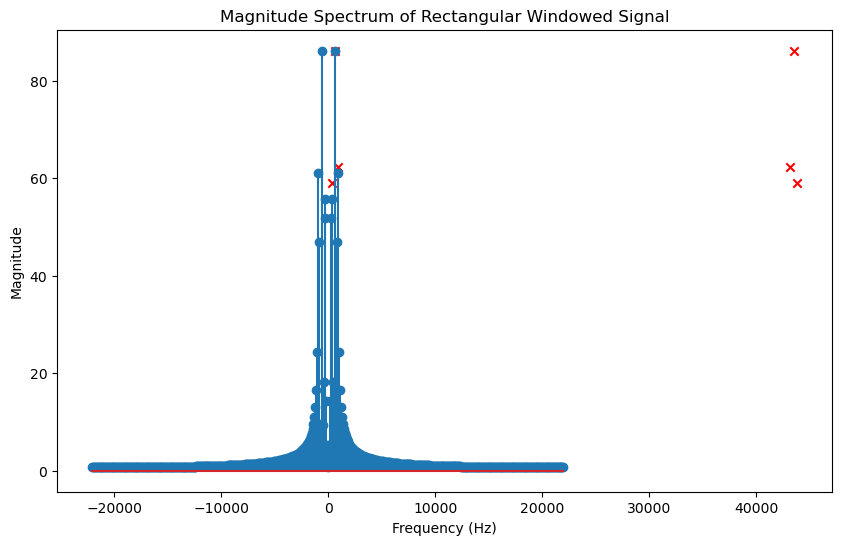

In [12]:
# In this code cell, we repeat the exact same process, as that of subquestions B1 - B3, only this time for a Hanning window instead of a rectangular window

# First, we define some hyperparameters for our additive synthesis model
fs = 44100 # Sampling rate
Ts = 1 / fs # Sampling period
# duration = 3 # seconds
# N = duration * fs # Number of samples
N = 512
duration = N / fs # seconds
t = np.linspace(0, duration, N, endpoint = False) # Time vector
# t = np.arange(0, duration, Ts) # Time vector

# We define the 3 fundamental frequencies
f1 = 301.4648 # Hz
f2 = 2 * f1 
f3 = 3 * f1

# All 3 signals should have unit magnitude (normalized amplitude) and no initial phase
s1 = np.cos(2 * np.pi * f1 * t)
s2 = np.cos(2 * np.pi * f2 * t)
s3 = np.cos(2 * np.pi * f3 * t)

# We want to create the new signal using additive synthesis
new_signal_B4 = s1 + s2 + s3

# We, first, normalize the signal
new_signal_B4 = new_signal_B4 / new_signal_B4.max()

# Since we want the new signal to have a length of 512 samples, we need to interpolate it
# new_t = np.linspace(0, duration, 512, endpoint = False) # Time vector for the new signal
# new_signal_interp_B4 = np.interp(new_t, t, new_signal)

# We, now, play the synthesized signal
# sd.play(new_signal_interp_B4, fs)

# We quantize the signal using 32-bit PCM (not neccessary, again can be commented out)
# new_signal_interp_B4 = np.int32(new_signal_interp * (2**31 - 1))

# We optionally save the signal in the 'Sound files' folder
wavfile.write('Sound files/additive_synthesis_signal_B4.wav', fs, new_signal_B4)
# NOTE: We do not intent to replay the synthesized signal in Windows Media Player, so we don't quantize it to 32-bit PCM

# We, now, plot the synthesized signal
plt.figure(figsize = (10, 4))
plt.plot(t[:100], new_signal_B4[:100]) # We plot only the first 100 samples so that it's easier to visualize the signal
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Additive synthesis signal')
plt.show()


# We will, now, use the Hannig window instead of the rectangular window to compute the DFT of the synthesized signal
signal_B4 = new_signal_B4 # We use the synthesized signal

# First, we define the DFT length (N)
N = len(signal_B4) # Number of samples of the signal

# We will, now, use the Hanning window instead of the rectangular window to compute the DFT of the synthesized signal
window = np.hanning(N) # Hanning window

# We, then, multiply the signal by the window
windowed_signal = signal_B4 * window

# We perform the Discrete Fourier Transform (DFT) on the windowed signal
magnitude_spectrum_B4 = np.abs(np.fft.fft(windowed_signal)) # We use np.abs to get the magnitude of the DFT (to keep only the real part)

# We get the frequency axis of the DFT (we want to keep only the positive frequencies)
freq_axis = np.fft.fftfreq(N, 1 / fs) # We use the sampling frequency to get the frequency axis

# We, finally, plot the magnitude spectrum of the signal
plt.stem(freq_axis, magnitude_spectrum_B4) # We use a stem plot to visualize the magnitude spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Hanning Windowed Signal')
plt.show()


# We, again, need to flatten the magnitude spectrum
magnitude_spectrum_B4_flat = magnitude_spectrum_B4.flatten()

# We, then, find the peaks of the magnitude spectrum
pks, _ = find_peaks(magnitude_spectrum_B4_flat, distance = 1) # We set the distance between peaks to 1 in order to find all peaks

# We, now, get the locations (bins) and values of the peaks
locs_B4 = pks # The location of the peaks is simply the indices of the peaks
pk_values_B4 = magnitude_spectrum_B4_flat[locs_B4] # Values


# To convert the peak locations (bins) to frequency values, we use the formula fk = k * fs / N
# that we implemented above
peak_frequencies_B4 = fk[locs_B4] # We get the frequency values of the peak locations

# We, then, generate the amplitude - frequency vector (list) of the peaks
# NOTE: Conventionally, we add the amplitude of the peak first, then the corresponding frequency
amplitude_frequency_pairs_B4 = []
for i in range(len(locs_B4)):
    amplitude_frequency_pairs_B4.append(pk_values_B4[i])  # Amplitude of the peak
    amplitude_frequency_pairs_B4.append(peak_frequencies_B4[i])  # Frequency of the peak


# print("Original Amplitude - Frequency pairs:\n", amplitude_frequency_pairs)

# We compare the peak frequencies with the original fundamendal frequencies, simply by printing them out

# print("\nOriginal frequencies:\n", [f1, f2, f3])
# print("\nPeak frequencies:\n", peak_frequencies_B4)

# We will, again, use the parabolic interpolation method to estimate the peak frequencies more accurately than before

# We start by initializing an empty list to store the amplitude - frequency pairs of the peaks
amplitude_frequency_pairs_parabolic_B4 = []

# We, now, perform parabolic interpolation on each peak to estimate the peak frequency more accurately
# Since parabolic interpolation requires 3 points to find local maximum, we will use the peak location
# and its two neighboring points to perform the interpolation
for loc in locs_B4:
    # We get the 3 points for parabolic interpolation
    b = loc  # Index of the peak
    a = max(b - 1, 0)  # Index of the point to the left of the peak (if it exceeds the bounds of the array, we set it to 0) 
    c = min(b + 1, len(magnitude_spectrum_B4_flat) - 1)  # Index of the point to the right of the peak (if it exceeds the bounds of the array, we set it to the last index)
    
    # We, now, get the magnitudes of the 3 points
    fa = magnitude_spectrum_B4_flat[a]
    fb = magnitude_spectrum_B4_flat[b]
    fc = magnitude_spectrum_B4_flat[c]
    
    # And, then, use the parabolic interpolation formula to estimate the peak frequency using the 3 points, as such: 
    
    # We calculate the interpolated peak location (bin) first
    interpolated_loc = 0.5 * (fa - fc) / (fa - 2 * fb + fc)
    
    # We, then, calculate the magnitude of the interpolated peak location
    interpolated_mag = fb - 0.25 * (fa - fc) * interpolated_loc
    
    # We get the interpolated frequency of the peak using the formula fk = k * fs / N
    interpolated_freq = (loc + interpolated_loc) * fs / N
    
    # And we, finally, append the amplitude - frequency pair to the list
    amplitude_frequency_pairs_parabolic_B4.append(interpolated_mag)
    amplitude_frequency_pairs_parabolic_B4.append(interpolated_freq)


# We, now, print the amplitude - frequency pairs obtained using parabolic interpolation
# print("\nAmplitude - Frequency pairs obtained WITH parabolic interpolation:\n", amplitude_frequency_pairs_parabolic_B4)

# To estimate whether the result improve or not, we print the previously obtained amplitude - frequency pairs
# print("\nAmplitude - Frequency pairs obtained WITHOUT parabolic interpolation:\n", amplitude_frequency_pairs_B4)


# We, optionally, plot the magnitude spectrum of the originally Hanning windowed signal, as well as and the interpolated signal.
plt.figure(figsize = (10, 6))

plt.stem(freq_axis, magnitude_spectrum_B4, label = 'Magnitude Spectrum of Windowed Signal')

# We, now, plot the peak frequencies of the interpolated signal
plt.scatter(amplitude_frequency_pairs_parabolic_B4[1::2], amplitude_frequency_pairs_parabolic_B4[::2], color = 'red', marker = 'x', label = 'Estimated Peaks using Parabolic Interpolation)') 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Hanning Windowed Signal')
plt.show()


# We, also optionally, plot the magnitude spectrum of the original signal, as well as the interpolated signal
plt.figure(figsize = (10, 6))
plt.stem(freq_axis, magnitude_spectrum, label = 'Magnitude Spectrum of Windowed Signal')

# We, now, plot the peak frequencies of the interpolated signal
plt.scatter(amplitude_frequency_pairs_parabolic[1::2], amplitude_frequency_pairs_parabolic[::2], color = 'red', marker = 'x', label = 'Estimated Peaks using Parabolic Interpolation)') 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Rectangular Windowed Signal')
plt.show()

# NOTE: By using a Hanning window instead of a rectangular one, we can see that the peaks are more accurate in the magnitude spectrum of the signal than before.
# The peak frequencies are closer to the original frequencies of the synthesized signal, and the amplitudes are more accurate as well.
# This is because the Hanning window tapers the signal at the edges, reducing the spectral leakage effect that we observed with the rectangular window.
# The Hanning window is also known to reduce the side lobes of the DFT, which improves the resolution of the peaks in the frequency domain.
# This is something we can see for ourselves in the plots below, as the peaks are more pronounced and accurate in the new magnitude spectrum.


### Question C, subquestion 1 (C1)

In [13]:
# In this code cell, we will be using the sound we analyzed in question A (signal_A) to compute and display its RMS amplitude envelope,
# using a block size of 50 milliseconds without overlapping.

# Our task is to modify given function below, which returns objects 'RMS' and 't', where RMS is the RMS amplitude envelope and t is the time
# vector corresponding to the RMS values.
# NOTE: Arguments 'BlockLength' and 'HopLength' are supposed to be in samples, not seconds.
def myRMSenv(x, BlockLength, HopLength, fs):
    # We first need to compute the number of blocks and the number of samples in the signal
    NumOfBlocks = int(np.ceil(len(x) // HopLength)) # Number of blocks
    
    # We, now, compute the time stamps
    t = np.arange(0, NumOfBlocks) * HopLength + (BlockLength // 2) / fs # Time vector
    
    # We allocate appropriate memory for the RMS amplitude envelope
    RMS = np.zeros(NumOfBlocks) # RMS amplitude envelope
    
    for i in range(NumOfBlocks):
        # We compute the start and end indices of the block
        start_index = i * HopLength
        end_index = min(start_index + BlockLength, len(x))
        
        # We compute the RMS value of the block
        RMS[i] = np.sqrt(np.mean(x[start_index:end_index] ** 2)) # We use the formula for RMS value of a signal
    
    return RMS, t

### Question C, subquestion 2 (C2)

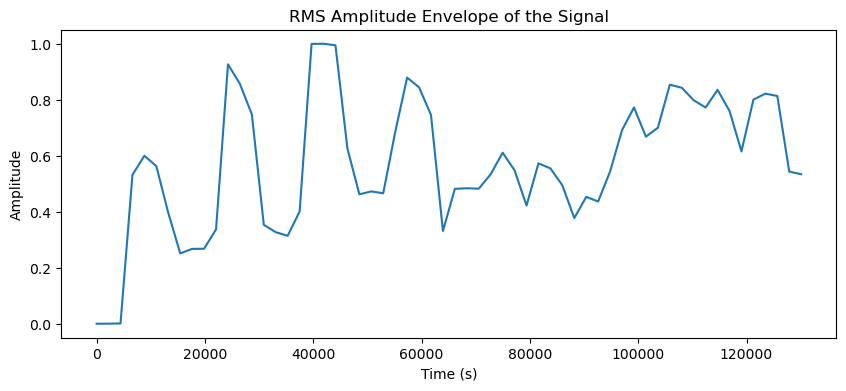

In [14]:
# In this code cell, we will interpolate the RMS amplitude envelope to have the same length as the original signal, 
# normalize its values and then plot it.

# As was previously stated, we will be using the 3 second long signal we analyzed in question A (signal_A).
# First, we define our hyperparameters:
fs_C = 44100 # Sampling rate
Ts_C = 1 / fs_C # Sampling period
t = np.arange(0, len(signal_A) / fs_C, Ts_C) # Time vector of the original signal
BlockLength = int(0.05 * fs_C) # Block length of 50 milliseconds (calculated in samples)
HopLength = BlockLength # Hop length is equal to the block length (no overlap)

# We, now, compute the RMS amplitude envelope of the signal using the given function
RMS, t_RMS = myRMSenv(signal_A, BlockLength, HopLength, fs_C)

# We, then, use linear interpolation to interpolate the RMS amplitude envelope to have the same length as the original signal
RMS_interp = interp1d(t_RMS, RMS, kind = 'linear')(t_RMS) # We use linear interpolation with the new time vector

# We normalize the interpolated RMS amplitude envelope
RMS_interp = RMS_interp / RMS_interp.max() # Scaling the values so that they reach a maximum of 1

# We, finally, plot the RMS amplitude envelope
plt.figure(figsize = (10, 4))
plt.plot(t_RMS, RMS_interp)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('RMS Amplitude Envelope of the Signal')
plt.show()


### Question C, subquestion 3 (C3)

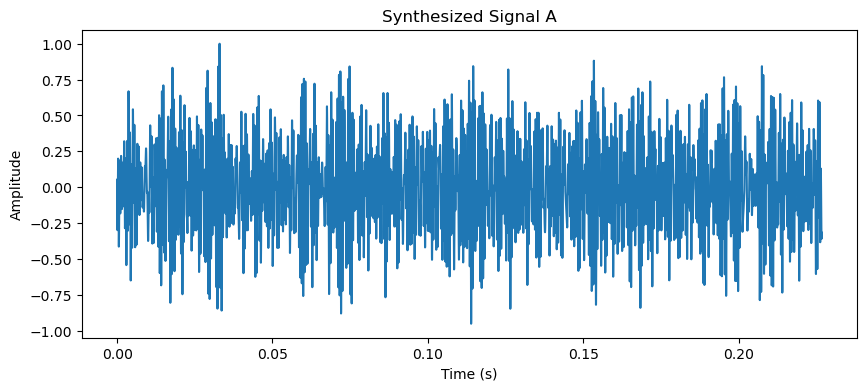

Fundamental Frequency: 548.5997596153846


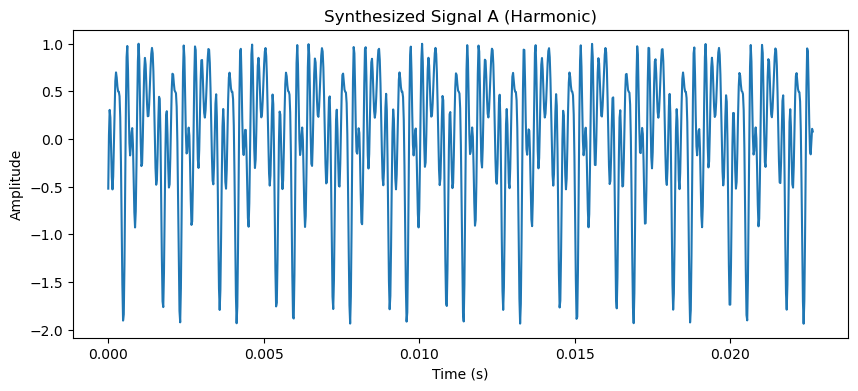

In [15]:
# In this code cell, we will create a sound using additive synthesis for the frequencies and their (possibly average) 
# magnitudes we estimated in question A, and then play the sound.
# We may experiment with different phases for each sinusoid to create different timbres and pick the phase configuration that sounds best to us.

# For that purpose, we use the same sampling rate as before (new_sr = 44100 Hz) and the same duration (duration = 3 seconds).
new_duration = 3 # seconds, same as max duration of the signal
t = np.linspace(0, new_duration, int(new_sr * new_duration), endpoint = False) # Time vector

# We, now, want to use the magnitudes and frequencies we estimated in question A to create the sound using additive synthesis
frequencies_A = strongest_frequencies # The 10 strongest frequencies 
magnitudes_A = peak_magnitudes # Magnitudes (we can experiment with different magnitudes) 
average_magnitude = np.mean(magnitudes_A) # Average magnitude of the frequencies


#* IMPLEMENTATION 1: In this implementation, we use the 10 strongest frequencies from the spectrogram to create our synthesized sound.
#* We do NOT use any harmonic relationship between the frequencies, but simply add the sinusoidal waves corresponding to each frequency to create the sound.

# We also set random phases for each frequency to create different timbres
random_phases = np.random.uniform(0, 2 * np.pi, len(frequencies_A))

# We, now, create the sound using additive synthesis
synthesized_signal_A = np.zeros(len(t)) # Initialize the sound signal
for i, frequency in enumerate(frequencies_A):
    # We, then, create the sinusoidal wave corresponding to the frequency
    sine_wave = average_magnitude * np.cos(2 * np.pi * frequency * t + random_phases[i])
    
    # We, now, add the sine wave corresponding to each note to the signal
    synthesized_signal_A += sine_wave

# We normalize the synthesized signal
synthesized_signal_A = synthesized_signal_A / synthesized_signal_A.max()

# We, now, play the synthesized sound (although it may not sound very pleasant)
# We will use a volume factor to lower its volume, as the sound is rather loud
# volume_factor = 0.6
# sd.play(synthesized_signal_A * volume_factor, new_sr)

# We quantize the signal using 32-bit PCM (not neccessary, again can be commented out)
# synthesized_sound_A = np.int32(synthesized_sound_A * (2**31 - 1))

# We save the signal in the 'Sound files' folder
wavfile.write('Sound files/synthesized_signal_A.wav', new_sr, synthesized_signal_A)

# We, optionally, plot the synthesized sound
plt.figure(figsize = (10, 4))
plt.plot(t[:10000], synthesized_signal_A[:10000]) # We plot only the first 10000 samples so that it's easier to visualize the signal
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Synthesized Signal A')
plt.show()


# NOTE: We notice that the synthesized sound may not sound very pleasant, as the frequencies and magnitudes we estimated in question A may not correspond to a harmonic sound.
# This is because the frequencies we estimated are the strongest frequencies in the signal, which may not necessarily correspond to the fundamental frequencies of a harmonic sound.
# In order to create a more pleasant sound, we would need to estimate the fundamental frequency of the sound and then synthesize the harmonics around that frequency.

#* IMPLEMENTATION 2: Now, we will repeat the same process as the one above, using the fundamental frequency of the synthesized sound.
#* This creates a more harmonic sound, as we use the fundamental frequency and its integer multiples (as well as a random offset defined in every loop).

# First, we spot the lowest harmonic frequency
fundamental_frequency = None # We use the lowest frequency as the fundamental frequency
strongest_frequency = max(frequencies_A) # We use the highest frequency as the fundamental frequency
for freq in frequencies_A:
    if freq < strongest_frequency / 2: # We use the frequency that is less than half of the highest frequency
        fundamental_frequency = freq
        break

# We, then, check for integer multiples of the fundamental frequency
if fundamental_frequency is not None: # If a fundamental frequency is found
    print("Fundamental Frequency:", fundamental_frequency)
    for freq in frequencies_A:
        if freq % fundamental_frequency == 0: 
            fundamental_frequency = freq # We, now, use the frequency that is an integer multiple of the fundamental frequency


# We repeat the same additive synthesis process using the fundamental frequency and its harmonics
synthesized_signal_harmonic = np.zeros(len(t)) # Initialize the sound signal
for i in range(1, 11): # We use the first 10 harmonics
    # We, then, create the sinusoidal wave corresponding to the harmonic
    random_phase = np.random.uniform(0, 2 * np.pi) # Random phase for each harmonic (to create different timbres)
    sine_wave = np.cos(2 * np.pi * fundamental_frequency * i * t + random_phase) # We use the fundamental frequency and its integer multiples
    
    # We, now, add the sine wave corresponding to each harmonic to the signal
    synthesized_signal_harmonic += sine_wave
    
# We normalize the synthesized signal
synthesized_signal_harmonic = synthesized_signal_harmonic / synthesized_signal_harmonic.max()

# We, now, play the synthesized sound (which should sound more harmonic)
# We will use a volume factor to lower its volume, as the sound is rather loud
# volume_factor = 0.1
# sd.play(synthesized_signal_harmonic * volume_factor, new_sr) 

# We quantize the signal using 32-bit PCM (not neccessary, again can be commented out)
# synthesized_sound_harmonic = np.int32(synthesized_sound_harmonic * (2**31 - 1))

# We save the signal in the 'Sound files' folder
wavfile.write('Sound files/synthesized_signal_A_harmonic.wav', new_sr, synthesized_signal_harmonic)

# We, optionally, plot the synthesized sound
plt.figure(figsize = (10, 4))
plt.plot(t[:1000], synthesized_signal_harmonic[:1000]) # We plot only the first 10000 samples so that it's easier to visualize the signal
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Synthesized Signal A (Harmonic)')
plt.show()


### Question C, subquestion 4 (C4)

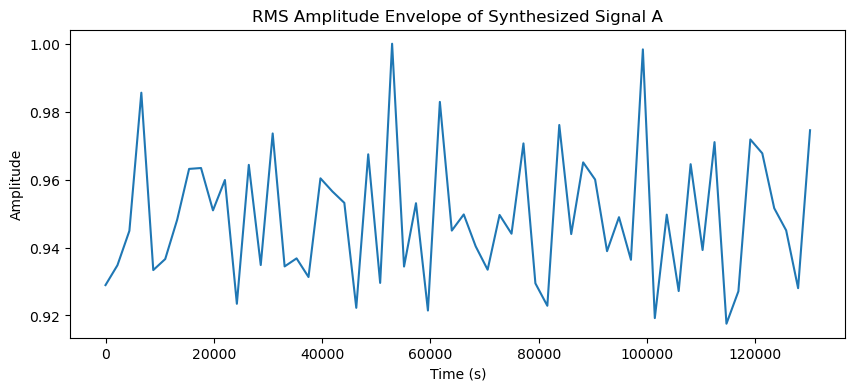

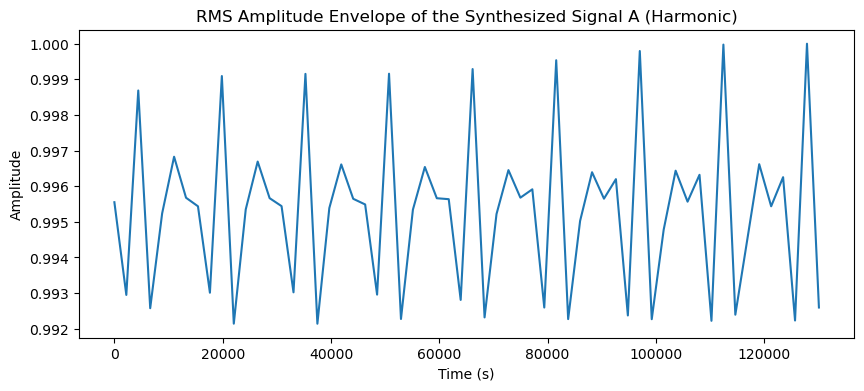

In [16]:
# In this, final, code cell, we will apply the RMS amplitude envelope we created in (C1) and used in (C2) to the synthesized sound we created in (C3).

# Applying the RMS amplitude envelope to the synthesized sound.
new_RMS_C4, new_t_RMS_C4 = myRMSenv(synthesized_signal_A, BlockLength, HopLength, fs_C) # We use the synthesized sound with the non-harmonic frequencies

# We interpolate the RMS amplitude envelope to have the same length as the original signal
new_RMS_interp_C4 = interp1d(new_t_RMS_C4, new_RMS_C4, kind = 'linear')(new_t_RMS_C4) # We use linear interpolation with the new time vector

# We normalize the interpolated RMS amplitude envelope
new_RMS_interp_C4 = new_RMS_interp_C4 / new_RMS_interp_C4.max() # Scaling the values so that they reach a maximum of 1

# And we finally plot the RMS amplitude envelope
plt.figure(figsize = (10, 4))
plt.plot(new_t_RMS_C4, new_RMS_interp_C4)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('RMS Amplitude Envelope of Synthesized Signal A')
plt.show()


# Repeating process for the synthesized sound with the harmonic frequencies 
RMS_C4, t_RMS_C4 = myRMSenv(synthesized_signal_harmonic, BlockLength, HopLength, fs_C) # We use the synthesized sound with the harmonic frequencies

# We interpolate the RMS amplitude envelope to have the same length as the original signal
RMS_interp_C4 = interp1d(t_RMS_C4, RMS_C4, kind = 'linear')(t_RMS_C4) # We use linear interpolation with the new time vector

# We normalize the interpolated RMS amplitude envelope
RMS_interp_C4 = RMS_interp_C4 / RMS_interp_C4.max() # Scaling the values so that they reach a maximum of 1

# And we finally plot the RMS amplitude envelope
plt.figure(figsize = (10, 4))
plt.plot(t_RMS_C4, RMS_interp_C4)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('RMS Amplitude Envelope of the Synthesized Signal A (Harmonic)')
plt.show()
